In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd

style.use('ggplot')

%matplotlib inline

In [2]:
X = np.array([
    [1,2],
    [1.5,1.8],
    [5,8],
    [8,8],
    [1,0.6],
    [9,11],
])

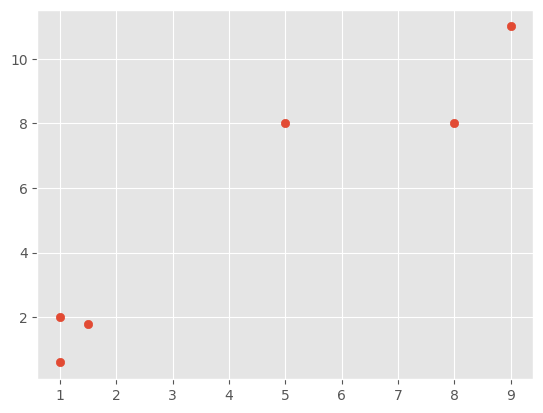

In [4]:
plt.scatter(X[:,0], X[:,1])

In [5]:
clf = KMeans(n_clusters=2)
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

In [6]:
centroids

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

In [7]:
labels

array([0, 0, 1, 1, 0, 1])

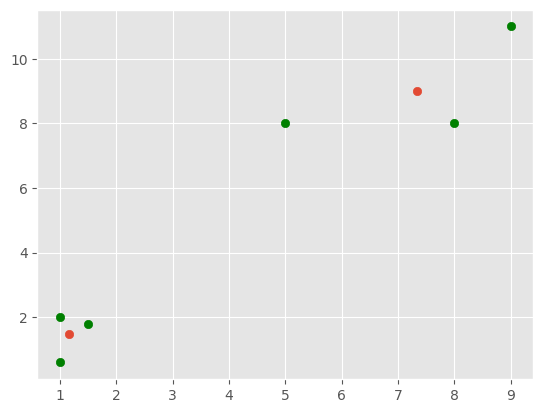

In [12]:
clf = KMeans(n_clusters=2)
clf.fit(X)

centroids = clf.cluster_centers_
labels = clf.labels_

plt.scatter(X[:,0], X[:,1], c='g')
plt.scatter(centroids[:,0], centroids[:,1])

In [15]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_excel('./titanic.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [18]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [19]:
df.drop(columns=['name', 'body'], inplace=True)

In [25]:
def handle_non_numerical_data(df):
    columns = df.columns
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_content = df[column].values.tolist()
            unique_values = set(column_content)
            x = 0
            for unique in unique_values:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x += 1
            df[column] = list(map(convert_to_int, df[column]))
    return df

In [26]:
df = handle_non_numerical_data(df)

In [27]:
df.sample()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
13,1,1,1,26.0,0,0,644,78.85,55,1,15,112


In [28]:
X = np.array(df.drop(columns=['survived']).astype(float))
y = np.array(df['survived'])

In [40]:
from sklearn.impute import SimpleImputer

X = SimpleImputer().fit_transform(X)

In [41]:
clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(n_clusters=2)

In [47]:
X = preprocessing.StandardScaler().fit_transform(X)

In [48]:
clf = KMeans(n_clusters=2)
clf.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct / len(X))

0.30786860198624905


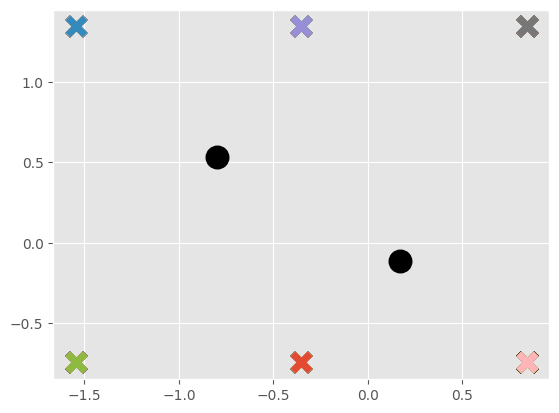

In [53]:
class KMeans:
    def __init__(self, k=2, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
    
    def fit(self, data):
        self.centroids = {}
        
        for i in range(self.k):
            self.centroids[i] = data[i]
        
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in data:
                distances = [np.linalg.norm(featureset - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid - original_centroid) / original_centroid*100.0) > self.tol:
                    optimized = False
            if optimized:
                break
    
    def predict(self, data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


clf = KMeans()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1], marker='o', color='k', s=150, linewidths=5)

for classification in clf.classifications:
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='x', s=150, linewidths=5)